In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
smallsize = 4
largesize = 40

Gc = 0.018 # co op growth rate
Gs = 0.02 # selfish growth rate

Cc = 0.1 # co op resource consumption rate
Cs = 0.2 # selfish resource consumption rate

N = 4000 #pop number
K = 0.1 # death rate

R_small = 4 # resource influx, R.
R_large = 50 #resource influx, R.

generations = 120 #number of generations



        

In [3]:
small = [N/4, N/4, 4] # small = [selfish, coop, group size] TOTAL NUMBER OF GENOTYPES IN SMALL
large = [N/4, N/4, 40] # large = [selfish, coop, group size] TOTAL NUMBER OF GENOTYPES IN lARGE

In [4]:
def creategroups(small_or_large): # creates a list of lists, each sublist is a group with [No.of selfish,No.of coop]
    collection = [] 
    total = small_or_large[0] + small_or_large[1] #total number of that genotype
    replace = total
    A = small_or_large[0]
    for i in range(0, int(total/small_or_large[2])): # total number of groups for that size which will be created
        group=[]
        selfish_count = 0
        coop_count = 0
        for j in range(0,small_or_large[2]):
            if random.random() < A/(replace) : # number of selfish, so A = small[0]
                selfish_count += 1
                A -= 1
                replace -= 1
            else:
                coop_count += 1
                replace -= 1
        collection += [[selfish_count,coop_count]]
    return collection # returns a list of lists, each sub list is a group
                

In [5]:
def reproduction_small(small):
    new_group = []
    R_influx = R_small
    for i in range(0,len(small)): # so will be 500 at first
        
        group_i = small[i]

        n_selfish = group_i[0] 
        
        top_selfish = n_selfish*Gs*Cs # top part of r, for selfish
        
        n_coop = group_i[1] # as co op = 1, sum will tell us how many there are
        top_coop = n_coop*Gc*Cc # top part of r, for co op
 


        bottom_both = (top_selfish + top_coop) # bottom part of the fraction

        r_selfish = (top_selfish/bottom_both)*R_small # THIS WILL GIVE ME THE r VALUE FOR THAT GROUP
        r_coop = (top_coop/bottom_both)*R_small
        
        #DONT TAKE INTIGER UNLESS ON LAST STEP
        n_selfish = (n_selfish + (r_selfish/Cs) - K*n_selfish) # number of selfish now in group
        n_coop = (n_coop + (r_coop/Cc) - K*n_coop)

        group_i=[n_selfish,n_coop]
        new_group += [group_i]
        
        
    return new_group

In [6]:
def reproduction_large(large):

    new_group = []
    R_influx = R_large
        
    for i in range(0,len(large)):
        group_i = large[i]

        n_selfish = group_i[0] 
        top_selfish = n_selfish*Gs*Cs
        
        n_coop = group_i[1] # as co op = 1, sum will tell us how many there are
        top_coop = n_coop*Gc*Cc

        bottom_both = (top_selfish + top_coop)

        r_selfish = (top_selfish/bottom_both)*R_large # THIS WILL GIVE ME THE r VALUE FOR THAT GROUP
        r_coop = (top_coop/bottom_both)*R_large

        n_selfish = (n_selfish + (r_selfish/Cs) - K*n_selfish) # number of selfish now in group
        n_coop = (n_coop + (r_coop/Cc) - K*n_coop)

        group_i=[n_selfish,n_coop]
        new_group += [group_i]
        
    return new_group

In [7]:
def rescale(small_pool,large_pool): # rescales the migrant pool into new small and large (sum ~= 4000)
    pool_size = small_pool[0] + small_pool[1] + large_pool[0] + large_pool[1] 
    
    new_small_selfish = int(N*small_pool[0]/pool_size )
    
    new_small_coop = int(N*small_pool[1]/pool_size )
    
    new_large_selfish = int(N*large_pool[0]/pool_size)
    
    new_large_coop = int(N*large_pool[1]/pool_size)
    
    small = [new_small_selfish, new_small_coop, smallsize]
    large = [new_large_selfish, new_large_coop, largesize]
#     print(small[0] + small[1] + large[0] + large[1])
    return small,large

In [8]:
# IGNORE

# def rescale2(small_pool,large_pool): # rescales the migrant pool into new small and large (sum ~= 4000)
#     pool_size_small = small_pool[0] + small_pool[1]
#     pool_size_large = large_pool[0] + large_pool[1]
    
#     new_small_selfish = int(4000*small_pool[0]/pool_size_small )
    
#     new_small_coop = int(4000*small_pool[1]/pool_size_small )
    
#     new_large_selfish = int(4000*large_pool[0]/pool_size_large)
    
#     new_large_coop = int(4000*large_pool[1]/pool_size_large)
    
#     small = [new_small_selfish, new_small_coop, 4]
#     large = [new_large_selfish, new_large_coop, 40]
# #     print(small[0] + small[1] + large[0] + large[1])
#     return small,large


original small [1000.0, 1000.0, 4] original large [1000.0, 1000.0, 40]


<function matplotlib.pyplot.show(*args, **kw)>

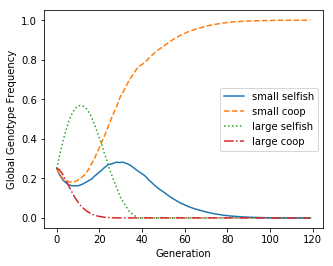

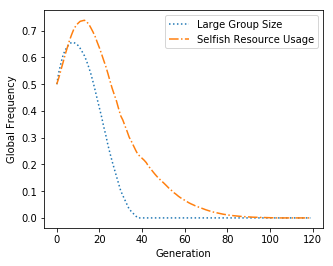

In [13]:
# 1. Initialisation: Initialise the migrant pool with N individuals.

#first time step there are equal in each variation
store1 = []
store2 = []
store3 = []
store4 = []
store5 = []
store6 = []
gen = 120
R_small = 4 # resource influx, R.
R_large = 50 #resource influx, R.
small = [N/4, N/4, 4] # small = [selfish (0), coop (1)] TOTAL NUMBER OF GENOTYPES IN SMALL
large = [N/4, N/4, 40] # large = [selfish, coop] TOTAL NUMBER OF GENOTYPES IN lARGE
print('original small', small,'original large', large)

# THIS IS WHERE T LOOP BEGINS

# for T in range(0,generations):
for T in range(0,gen):
    store1 += [small[0]/4000] #used for plots
    store2 += [small[1]/4000]
    store3 += [large[0]/4000]
    store4 += [large[1]/4000]
    store5 += [(large[0]+large[1])/4000] # both large genotypes
    store6 += [(small[0]+large[0])/4000] # both selfish genotypes
    totalselfishA = 0
    totalcoopA = 0
    totalselfishB = 0
    totalcoopB = 0
# 2. Group formation (aggregation): Assign individuals in the migrant pool to groups, as described in the main text below.
    
    A = creategroups(small)
    B = creategroups(large)
    
# 3. Reproduction: Perform reproduction within groups for t time-steps, as described in the text above
    for t in range(0,4):
        A = reproduction_small(A)
        B = reproduction_large(B)
    
# 4. Migrant pool formation (dispersal): Return the progeny of each group to the migrant pool
    for i in range(0,len(A)):
        totalselfishA += A[i][0]
        totalcoopA += A[i][1]
    for i in range(0,len(B)):
        totalselfishB += B[i][0]
        totalcoopB += B[i][1]
        
    small_pool = [ int(totalselfishA) , int(totalcoopA) ] # selfish (0), coop (1)
    large_pool = [ int(totalselfishB) , int(totalcoopB) ] # selfish (0), coop (1)
#     print('small pool:', small_pool, 'large pool:',large_pool)

# 5. Maintaining the global carrying capacity: 
# Rescale the migrant pool back to size N, retaining the proportion of individuals with each genotype.
    small = rescale(small_pool,large_pool)[0]
    large = rescale(small_pool,large_pool)[1]
#     print('the new small',small ,'the new large',large)

figure(figsize=(5,4))
plt.xlabel('Generation')
plt.ylabel('Global Genotype Frequency')
plt.plot(range(0,gen), store1, label='small selfish')
plt.plot(range(0,gen), store2, label='small coop', linestyle='--')
plt.plot(range(0,gen), store3, label='large selfish', linestyle =':')
plt.plot(range(0,gen), store4, label='large coop', linestyle = '-.')
plt.legend()
plt.show

figure(figsize=(5,4))
plt.xlabel('Generation')
plt.ylabel('Global Frequency')
plt.plot(range(0,gen), store5, label='Large Group Size', linestyle =':')
plt.plot(range(0,gen), store6, label='Selfish Resource Usage', linestyle = '-.')
plt.legend()
plt.show

# Extension 

In [14]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math
from numpy import arange, sin, pi



In [271]:
# I want to see the effects of having chaning variables which will simulate a 12 month cycle.
# to do this I will consider how the various rates change based on evidence from sciencetific papers
# I expect the trend to still go towards coop-small but selfish should increase in the pop every summer when resoucrs grow

# Assuming winter is bad for the pops and summer is good. This can change as some species thrive under different conditions.
# 

In [272]:
a = (math.sin(math.radians(x)) + 1)
print(a)

0.9999999999999998


In [15]:
def reproduction_large_E(large,T): # death rate is affected
    new_group = []
    R_influx = R_large
        
    for i in range(0,len(large)):
        group_i = large[i]

        n_selfish = group_i[0] 
        top_selfish = n_selfish*Gs*Cs
        
        n_coop = group_i[1] # as co op = 1, sum will tell us how many there are
        top_coop = n_coop*Gc*Cc

        bottom_both = (top_selfish + top_coop)

        r_selfish = (top_selfish/bottom_both)*R_large # THIS WILL GIVE ME THE r VALUE FOR THAT GROUP
        r_coop = (top_coop/bottom_both)*R_large

        n_selfish = (n_selfish + (r_selfish/Cs) - K_e(T)*n_selfish) # number of selfish now in group
        n_coop = (n_coop + (r_coop/Cc) - K_e(T)*n_coop)

        group_i=[n_selfish,n_coop]
        new_group += [group_i]
        
    return new_group


In [16]:
def reproduction_small_E(small,T): 
    new_group = []
    R_influx = R_small
    for i in range(0,len(small)): # so will be 500 at first
        
        group_i = small[i]

        n_selfish = group_i[0] 
        
        top_selfish = n_selfish*Gs*Cs # top part of r, for selfish
        
        n_coop = group_i[1] # as co op = 1, sum will tell us how many there are
        top_coop = n_coop*Gc*Cc # top part of r, for co op
 


        bottom_both = (top_selfish + top_coop) # bottom part of the fraction

        r_selfish = (top_selfish/bottom_both)*R_small # THIS WILL GIVE ME THE r VALUE FOR THAT GROUP
        r_coop = (top_coop/bottom_both)*R_small
        
        #DONT TAKE INTIGER UNLESS ON LAST STEP
        n_selfish = (n_selfish + (r_selfish/Cs) - K_e(T)*n_selfish) # number of selfish now in group
        n_coop = (n_coop + (r_coop/Cc) - K_e(T)*n_coop)

        group_i=[n_selfish,n_coop]
        new_group += [group_i]
        
        
    return new_group


In [275]:

def rescale_E(small_pool,large_pool,T): # rescales the migrant pool into new small and large (sum ~= 4000)
    pool_size = small_pool[0] + small_pool[1] + large_pool[0] + large_pool[1] 
    
    new_small_selfish = int(N*small_pool[0]/pool_size )
    
    new_small_coop = int(N*small_pool[1]/pool_size )
    
    new_large_selfish = int(N*large_pool[0]/pool_size)
    
    new_large_coop = int(N*large_pool[1]/pool_size)
    
    small = [new_small_selfish, new_small_coop, smallsize_E(T)]
    large = [new_large_selfish, new_large_coop, largesize_E(T)]
#     print(small[0] + small[1] + large[0] + large[1])
    return small,large

In [276]:
def season(x_gen): # given the current generation (0 - 360)
    a = math.cos(math.radians(x_gen)) + 1
    return a

In [277]:
# for i in range(0,360):
#     print(smallsize_E(i))

In [278]:


#all 4 genotypes are equal at initiation
# and then mixed every generation when t reaches gen_no
Gc = 0.018 # co op growth rate
Gs = 0.02 # selfish growth rate

Cc = 0.1 # co op resource consumption rate
Cs = 0.2 # selfish resource consumption rate

N = 4000 #pop number
K = 0.1
def K_e(T):
    a = K*(math.sin(math.radians(T)) + 1)   # death rate * season change which ranges from (2 - 0 - 2)
    return a

R_small = 4 # resource influx, R.
R_large = 50 #resource influx, R.

generations = 120 #number of generations


In [279]:
for i in range(0,361):
    print(K_e(i))

0.1
0.10174524064372835
0.1034899496702501
0.10523359562429438
0.10697564737441252
0.10871557427476582
0.11045284632676536
0.11218693434051474
0.11391731009600654
0.1156434465040231
0.11736481776669304
0.1190808995376545
0.12079116908177595
0.12249510543438652
0.12419218955996679
0.12588190451025208
0.12756373558169992
0.12923717047227368
0.13090169943749475
0.13255681544571568
0.13420201433256687
0.13583679495453002
0.1374606593415912
0.1390731128489274
0.14067366430758002
0.14226182617406996
0.14383711467890775
0.14539904997395467
0.1469471562785891
0.1484809620246337
0.15000000000000002
0.15150380749100545
0.1529919264233205
0.15446390350150271
0.15591929034707472
0.15735764363510463
0.15877852522924732
0.16018150231520484
0.16156614753256582
0.16293203910498374
0.16427876096865393
0.16560590289905075
0.16691306063588585
0.16819983600624988
0.16946583704589974
0.17071067811865476
0.17193398003386512
0.17313537016191705
0.17431448254773943
0.17547095802227722
0.1766044443118978
0.177

In [280]:
def reproduction_range(T):
    t = 2 + (2*math.sin(math.radians(T))) # + 1 to stop negative values
    return round(t) 

In [281]:
smallsize = 4
def smallsize_E(x): # adds +2 and -2
    a = smallsize + (smallsize/2)*(math.sin(math.radians(x))) # (math.sin(math.radians(x)))
    return round(a)

largesize = 40
def largesize_E(x):
    a = largesize + (  (largesize/2)*(math.sin(math.radians(x))))  # (math.sin(math.radians(x)) + 1)
    return round(a)

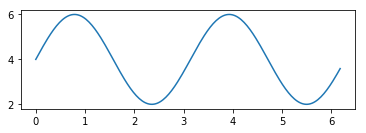

In [282]:
t = arange(0.0,6.2, 0.03)

fig = figure(1)

ax1 = fig.add_subplot(211)
ax1.plot(t, 4+2*sin(2*t))

In [283]:
for i in range(0,360):
    print(smallsize_E(i))

4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4


original small [1000.0, 1000.0, 4] original large [1000.0, 1000.0, 40]


<function matplotlib.pyplot.show(*args, **kw)>

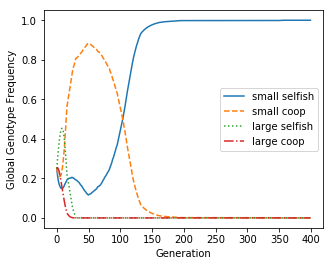

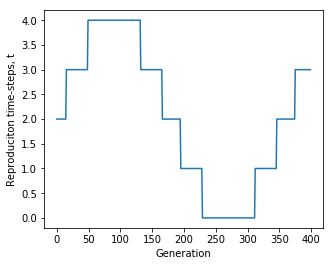

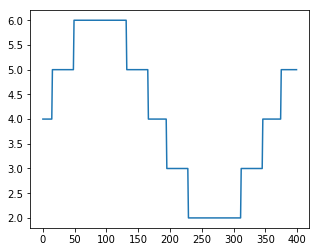

In [40]:
# 1. Initialisation: Initialise the migrant pool with N individuals.

#first time step there are equal in each variation
store1 = []
store2 = []
store3 = []
store4 = []
store5 = []
store6 = []
store7 = []
store8 = []
store9 = []
store10 = []
gen = 400
R_small = 4 # resource influx, R.
R_large = 50 #resource influx, R.
small = [N/4, N/4, smallsize] # small = [selfish (0), coop (1)] TOTAL NUMBER OF GENOTYPES IN SMALL
large = [N/4, N/4, largesize] # large = [selfish, coop] TOTAL NUMBER OF GENOTYPES IN lARGE
print('original small', small,'original large', large)

for counter in range(0,gen):
    T = counter
    store1 += [small[0]/4000] #used for plots
    store2 += [small[1]/4000]
    store3 += [large[0]/4000]
    store4 += [large[1]/4000]
    store5 += [(large[0]+large[1])/4000]
    store6 += [(small[0]+large[0])/4000]
    store7 += [reproduction_range(T)]
    store8 += [K_e(T)]
    store9 += [smallsize_E(T)]
    store10 += [largesize_E(T)]
    totalselfishA = 0
    totalcoopA = 0
    totalselfishB = 0
    totalcoopB = 0
# 2. Group formation (aggregation): Assign individuals in the migrant pool to groups, as described in the main text below.

    A = creategroups(small)
    B = creategroups(large)
# 3. Reproduction: Perform reproduction within groups for t time-steps, as described in the text above
    for t in range(0,reproduction_range(T)):
        A = reproduction_small_E(A,T)
        B = reproduction_large_E(B,T)
    
# 4. Migrant pool formation (dispersal): Return the progeny of each group to the migrant pool
    for i in range(0,len(A)):
        totalselfishA += A[i][0]
        totalcoopA += A[i][1]
    for i in range(0,len(B)):
        totalselfishB += B[i][0]
        totalcoopB += B[i][1]
        
    small_pool = [ int(totalselfishA) , int(totalcoopA) ] # selfish (0), coop (1)
    large_pool = [ int(totalselfishB) , int(totalcoopB) ] # selfish (0), coop (1)
#     print('small pool:', small_pool, 'large pool:',large_pool)

# 5. Maintaining the global carrying capacity: 
# Rescale the migrant pool back to size N, retaining the proportion of individuals with each genotype.
    small = rescale_E(small_pool,large_pool,T)[0]
    large = rescale_E(small_pool,large_pool,T)[1]

figure(figsize=(5,4))
plt.xlabel('Generation')
plt.ylabel('Global Genotype Frequency')
plt.plot(range(0,gen), store1, label='small selfish')
plt.plot(range(0,gen), store2, label='small coop', linestyle='--')
plt.plot(range(0,gen), store3, label='large selfish', linestyle =':')
plt.plot(range(0,gen), store4, label='large coop', linestyle = '-.')
plt.legend()
plt.show


figure(figsize=(5,4))
plt.xlabel('Generation')
plt.ylabel('Reproduciton time-steps, t')
plt.plot(range(0,gen), store7)
plt.show


In [31]:
def reproduction_range(T):
    t = 2 + (2*math.sin(math.radians(T))) # + 1 to stop negative values
    return round(t) 

In [37]:
for i in range(0,360):
    print(K_e(i))

0.1
0.10174524064372835
0.1034899496702501
0.10523359562429438
0.10697564737441252
0.10871557427476582
0.11045284632676536
0.11218693434051474
0.11391731009600654
0.1156434465040231
0.11736481776669304
0.1190808995376545
0.12079116908177595
0.12249510543438652
0.12419218955996679
0.12588190451025208
0.12756373558169992
0.12923717047227368
0.13090169943749475
0.13255681544571568
0.13420201433256687
0.13583679495453002
0.1374606593415912
0.1390731128489274
0.14067366430758002
0.14226182617406996
0.14383711467890775
0.14539904997395467
0.1469471562785891
0.1484809620246337
0.15000000000000002
0.15150380749100545
0.1529919264233205
0.15446390350150271
0.15591929034707472
0.15735764363510463
0.15877852522924732
0.16018150231520484
0.16156614753256582
0.16293203910498374
0.16427876096865393
0.16560590289905075
0.16691306063588585
0.16819983600624988
0.16946583704589974
0.17071067811865476
0.17193398003386512
0.17313537016191705
0.17431448254773943
0.17547095802227722
0.1766044443118978
0.177

In [18]:
def K_e(T):
    a = K*(math.sin(math.radians(T)) + 1)   
    return a

In [19]:
def reproduction_small_E(small,T): # reliant on K_e(T)
    new_group = []
    R_influx = R_small
    for i in range(0,len(small)): # so will be 500 at first
        
        group_i = small[i]

        n_selfish = group_i[0] 
        
        top_selfish = n_selfish*Gs*Cs # top part of r, for selfish
        
        n_coop = group_i[1] # as co op = 1, sum will tell us how many there are
        top_coop = n_coop*Gc*Cc # top part of r, for co op
 


        bottom_both = (top_selfish + top_coop) # bottom part of the fraction

        r_selfish = (top_selfish/bottom_both)*R_small # THIS WILL GIVE ME THE r VALUE FOR THAT GROUP
        r_coop = (top_coop/bottom_both)*R_small
        
        #DONT TAKE INTIGER UNLESS ON LAST STEP
        n_selfish = (n_selfish + (r_selfish/Cs) - K_e(T)*n_selfish) # number of selfish now in group
        n_coop = (n_coop + (r_coop/Cc) - K_e(T)*n_coop)

        group_i=[n_selfish,n_coop]
        new_group += [group_i]
        
        
    return new_group

def reproduction_large_E(large,T): # death rate is affected
    new_group = []
    R_influx = R_large
        
    for i in range(0,len(large)):
        group_i = large[i]

        n_selfish = group_i[0] 
        top_selfish = n_selfish*Gs*Cs
        
        n_coop = group_i[1] # as co op = 1, sum will tell us how many there are
        top_coop = n_coop*Gc*Cc

        bottom_both = (top_selfish + top_coop)

        r_selfish = (top_selfish/bottom_both)*R_large # THIS WILL GIVE ME THE r VALUE FOR THAT GROUP
        r_coop = (top_coop/bottom_both)*R_large

        n_selfish = (n_selfish + (r_selfish/Cs) - K_e(T)*n_selfish) # number of selfish now in group
        n_coop = (n_coop + (r_coop/Cc) - K_e(T)*n_coop)

        group_i=[n_selfish,n_coop]
        new_group += [group_i]
        
    return new_group

In [22]:

def rescale_E(small_pool,large_pool,T): # rescales the migrant pool into new small and large (sum ~= 4000)
    # relies on groupsize_E(T)
    pool_size = small_pool[0] + small_pool[1] + large_pool[0] + large_pool[1] 
    
    new_small_selfish = int(N*small_pool[0]/pool_size )
    
    new_small_coop = int(N*small_pool[1]/pool_size )
    
    new_large_selfish = int(N*large_pool[0]/pool_size)
    
    new_large_coop = int(N*large_pool[1]/pool_size)
    
    small = [new_small_selfish, new_small_coop, smallsize_E(T)]
    large = [new_large_selfish, new_large_coop, largesize_E(T)]
#     print(small[0] + small[1] + large[0] + large[1])
    return small,large

In [20]:
smallsize = 4
def smallsize_E(x): # adds +2 and -2
    a = smallsize + (smallsize/2)*(math.sin(math.radians(x))) # (math.sin(math.radians(x)))
    return round(a)

largesize = 40
def largesize_E(x):
    a = largesize + (  (largesize/2)*(math.sin(math.radians(x))))  # (math.sin(math.radians(x)) + 1)
    return round(a)